# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a brief template for CAB420 Assignment 1A, Question 1. It implements the data loading, and splitting the data into the predictors and response. You are to use the data splits defined here in your response.

The template also provides other suggestions around how to approach the problem.

Please make sure you read the assignment brief on canvas, and check the FAQ for other information.

**Note: File paths used in this template may need to change for your local machine. Please set these based on your local file system structure.**

In [1]:
# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# seaborn is another good plotting library. In particular, I like it for heatmaps (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import seaborn as sns;
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

In [2]:
# load data
train = pd.read_csv(r'C:\Users\milly\Desktop\CAB420\Data\Q1\communities_train.csv')
val = pd.read_csv(r'C:\Users\milly\Desktop\CAB420\Data\Q1\communities_val.csv')
test = pd.read_csv(r'C:\Users\milly\Desktop\CAB420\Data\Q1\communities_test.csv')

# Pull out X and y components of the data
# if you want to convert this data to numpy format, you can add .to_numpy() to the end of each row below
X_train = train.iloc[:,0:-1].to_numpy()
y_train = train.iloc[:,-1].to_numpy()
X_val = val.iloc[:,0:-1].to_numpy()
y_val = val.iloc[:,-1].to_numpy()
X_test = test.iloc[:,0:-1].to_numpy()
y_test = test.iloc[:,-1].to_numpy()

In [ ]:
# If you wish to pre-process the data, do so here. In your write-up, outline why you choose to do, or choose not to do, any
# pre-processing

# pre-processing not needed for this dataset

Train RMSE = 0.1042
Validation RMSE = 0.1549
Test RMSE = 0.1533

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     6.207
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           7.72e-28
Time:                        16:59:47   Log-Likelihood:                 251.07
No. Observations:                 298   AIC:                            -300.1
Df Residuals:                     197   BIC:                             73.27
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

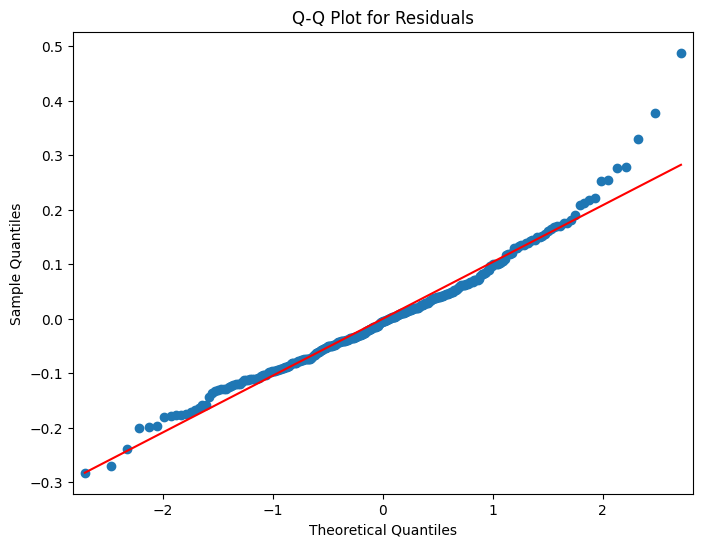

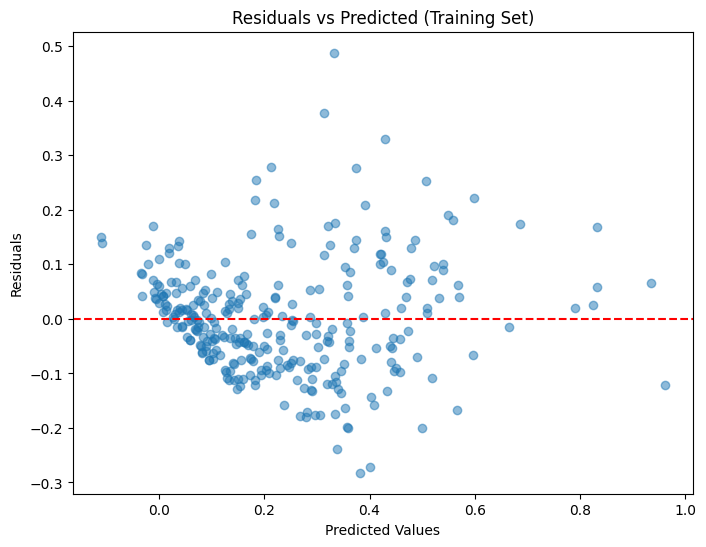

In [4]:
# train your Linear Regression model here. Data has already been split into predictors (X_train, X_val and X_test) and the
# desired response (y_train, y_val and y_test above).
#
# Note that you DO NOT NEED to remove any variables, or add higher order terms. JUST USE THE DATA AS IS.

# ---- 1. Train the Model ----
# Add intercept term to predictors
X_train_sm = sm.add_constant(X_train)  # Required for statsmodels
X_val_sm = sm.add_constant(X_val)
X_test_sm = sm.add_constant(X_test)

# Fit OLS model
model = sm.OLS(y_train, X_train_sm)
model_fit = model.fit()

# ---- 2. Define RMSE Printing Function ----
def print_rmse(y_true, y_pred, dataset_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{dataset_name} RMSE = {rmse:.4f}")

# ---- 3. Evaluate on All Datasets ----
# Predictions
y_train_pred = model_fit.predict(X_train_sm)
y_val_pred = model_fit.predict(X_val_sm)
y_test_pred = model_fit.predict(X_test_sm)

# Print RMSE
print_rmse(y_train, y_train_pred, "Train")
print_rmse(y_val, y_val_pred, "Validation")
print_rmse(y_test, y_test_pred, "Test")

# ---- 4. Model Summary ----
print("\nModel Summary:")
print(model_fit.summary())  # Detailed statistics (R², p-values, etc.)
print("\nModel Coefficients:")
print(model_fit.params)     # Print all coefficients

# ---- 5. Diagnostic Plots (Q-Q and Residuals vs Predicted) ----
# Q-Q Plot for normality check
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(model_fit.resid, ax=ax, line='s')  # 's' = standardized line
plt.title('Q-Q Plot for Residuals')
plt.show()

# Residuals vs Predicted for homoscedasticity check
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_train_pred, model_fit.resid, alpha=0.5)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
plt.title('Residuals vs Predicted (Training Set)')
plt.show()


# Once you've trained the model, evaluate it. This would include:
#  - Measuring the accuracy of the model (i.e. RMSE or similar measures)
#  - Looking at the properties of the fitted model, for example the R^2, and if all terms are contributing to the model
#  - Considering the validity of the trained model. This could include assumptions about independent predictors, and the 
#    distribution of the residuals
# Your write-up should include your findings regarding the above.

Best values on Validation Data set
Best R Squared = 0.7175300774227982
Best Adjusted = 0.5719715969110768
Best RMSE (val) = 0.14288426500863166
Best RMSE (test) = 0.13044065240085284
Best coefficients on the normalised model
Best slope = [[ 0.08750024]
 [ 0.00823733]
 [-0.10362422]
 [ 0.08981449]
 [-0.01194816]
 [ 0.00379591]
 [-0.16353141]
 [-0.04220792]
 [ 0.0771013 ]
 [ 0.07327969]
 [ 0.09905673]
 [ 0.00311742]
 [ 0.04024295]
 [ 0.05652879]
 [-0.0332547 ]
 [ 0.02508849]
 [-0.09462955]
 [ 0.1027892 ]
 [ 0.07419272]
 [-0.08543077]
 [ 0.02682063]
 [ 0.0163952 ]
 [ 0.01808506]
 [-0.00197884]
 [-0.04341247]
 [ 0.09378547]
 [ 0.01020457]
 [ 0.0554957 ]
 [-0.0180973 ]
 [-0.0954623 ]
 [-0.05245881]
 [ 0.04693443]
 [ 0.0565341 ]
 [-0.08545275]
 [ 0.1727773 ]
 [-0.0862842 ]
 [-0.00896306]
 [ 0.02673285]
 [-0.02201219]
 [-0.00114981]
 [ 0.01645482]
 [ 0.01035144]
 [ 0.00475462]
 [ 0.07257292]
 [-0.08312612]
 [-0.09838619]
 [-0.07112216]
 [-0.01797262]
 [ 0.07414349]
 [-0.10658694]
 [ 0.0675668

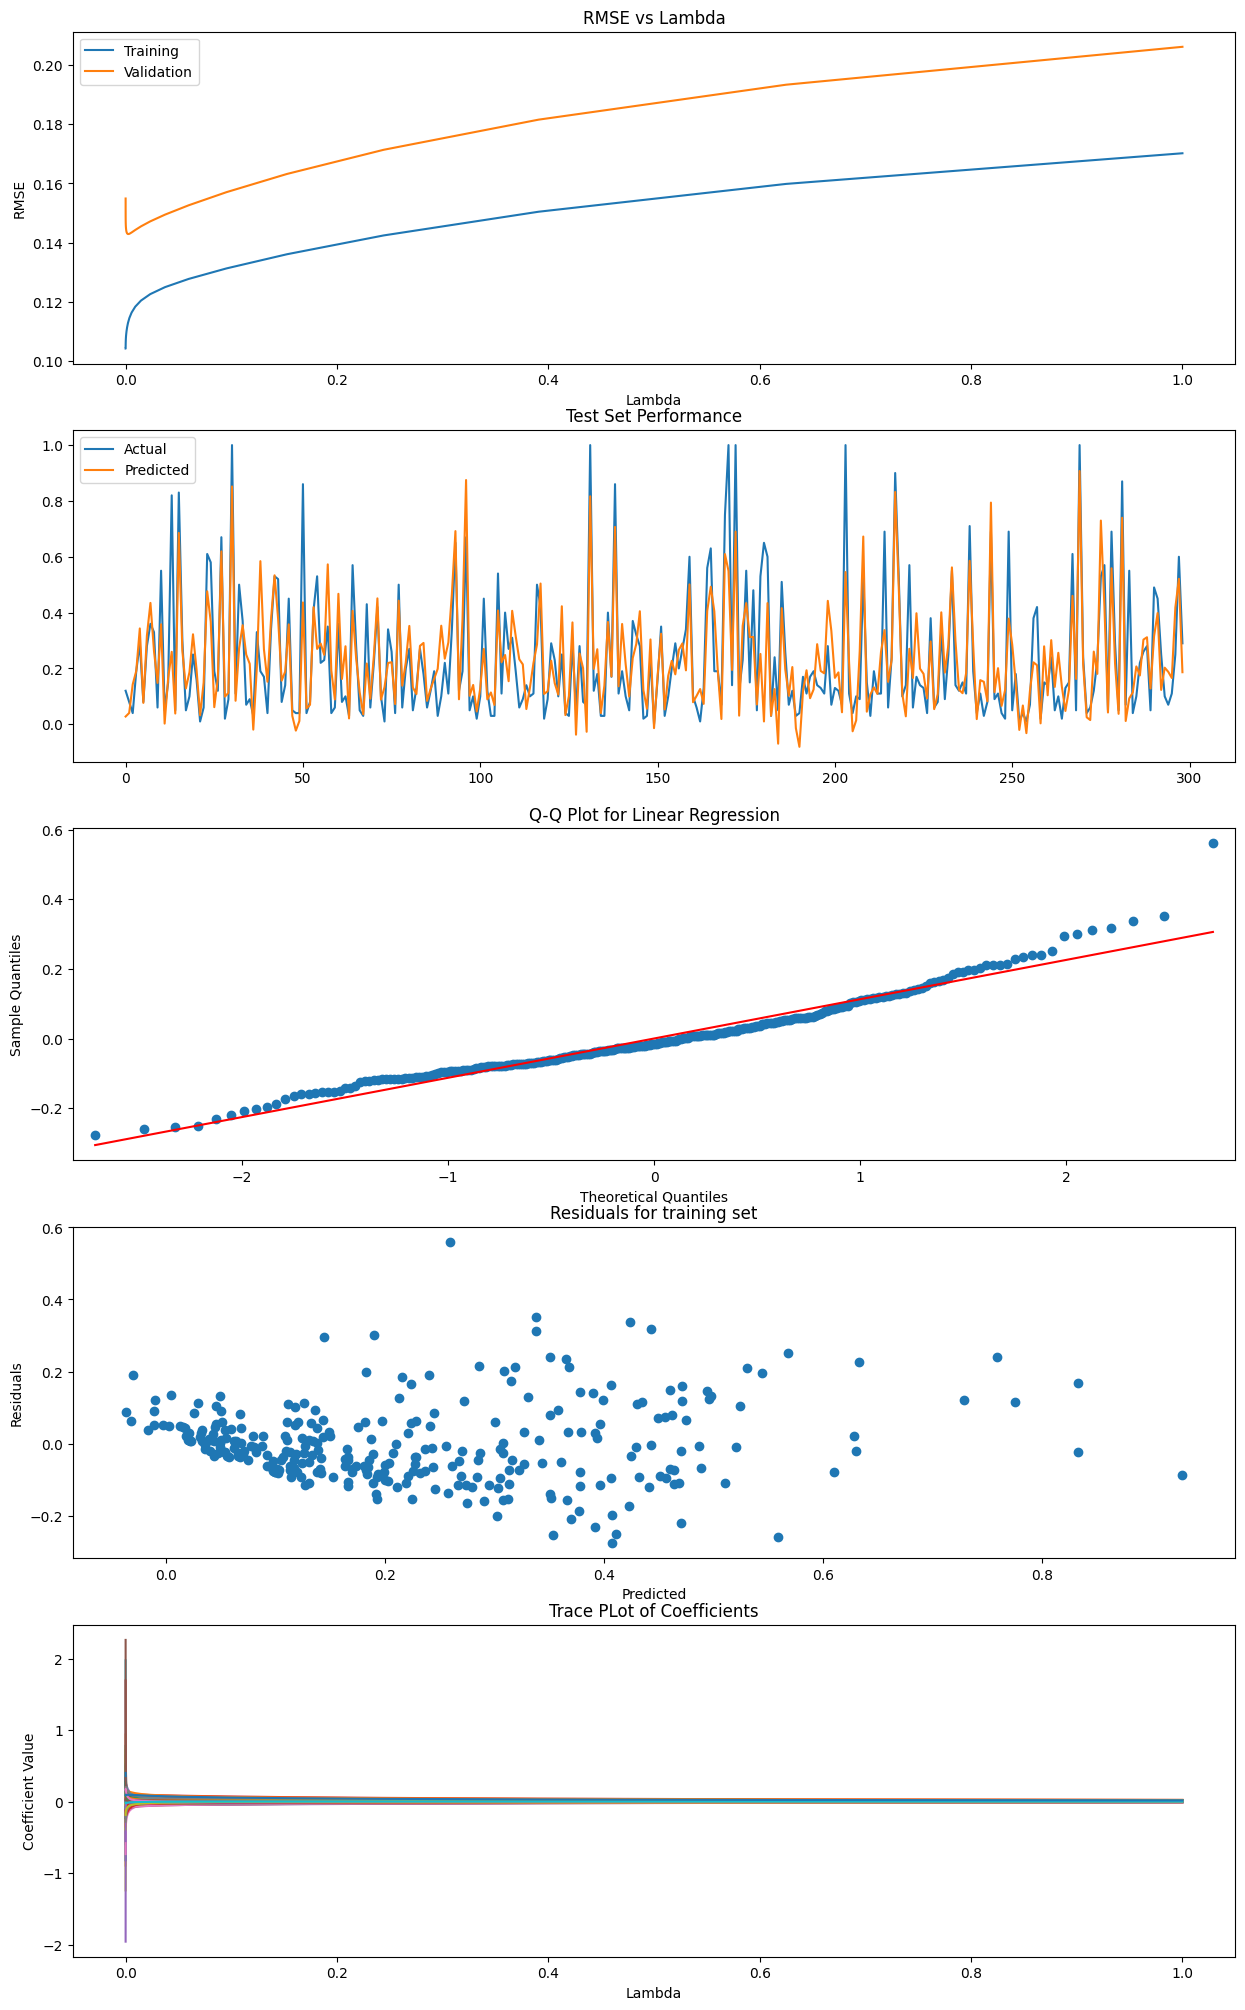

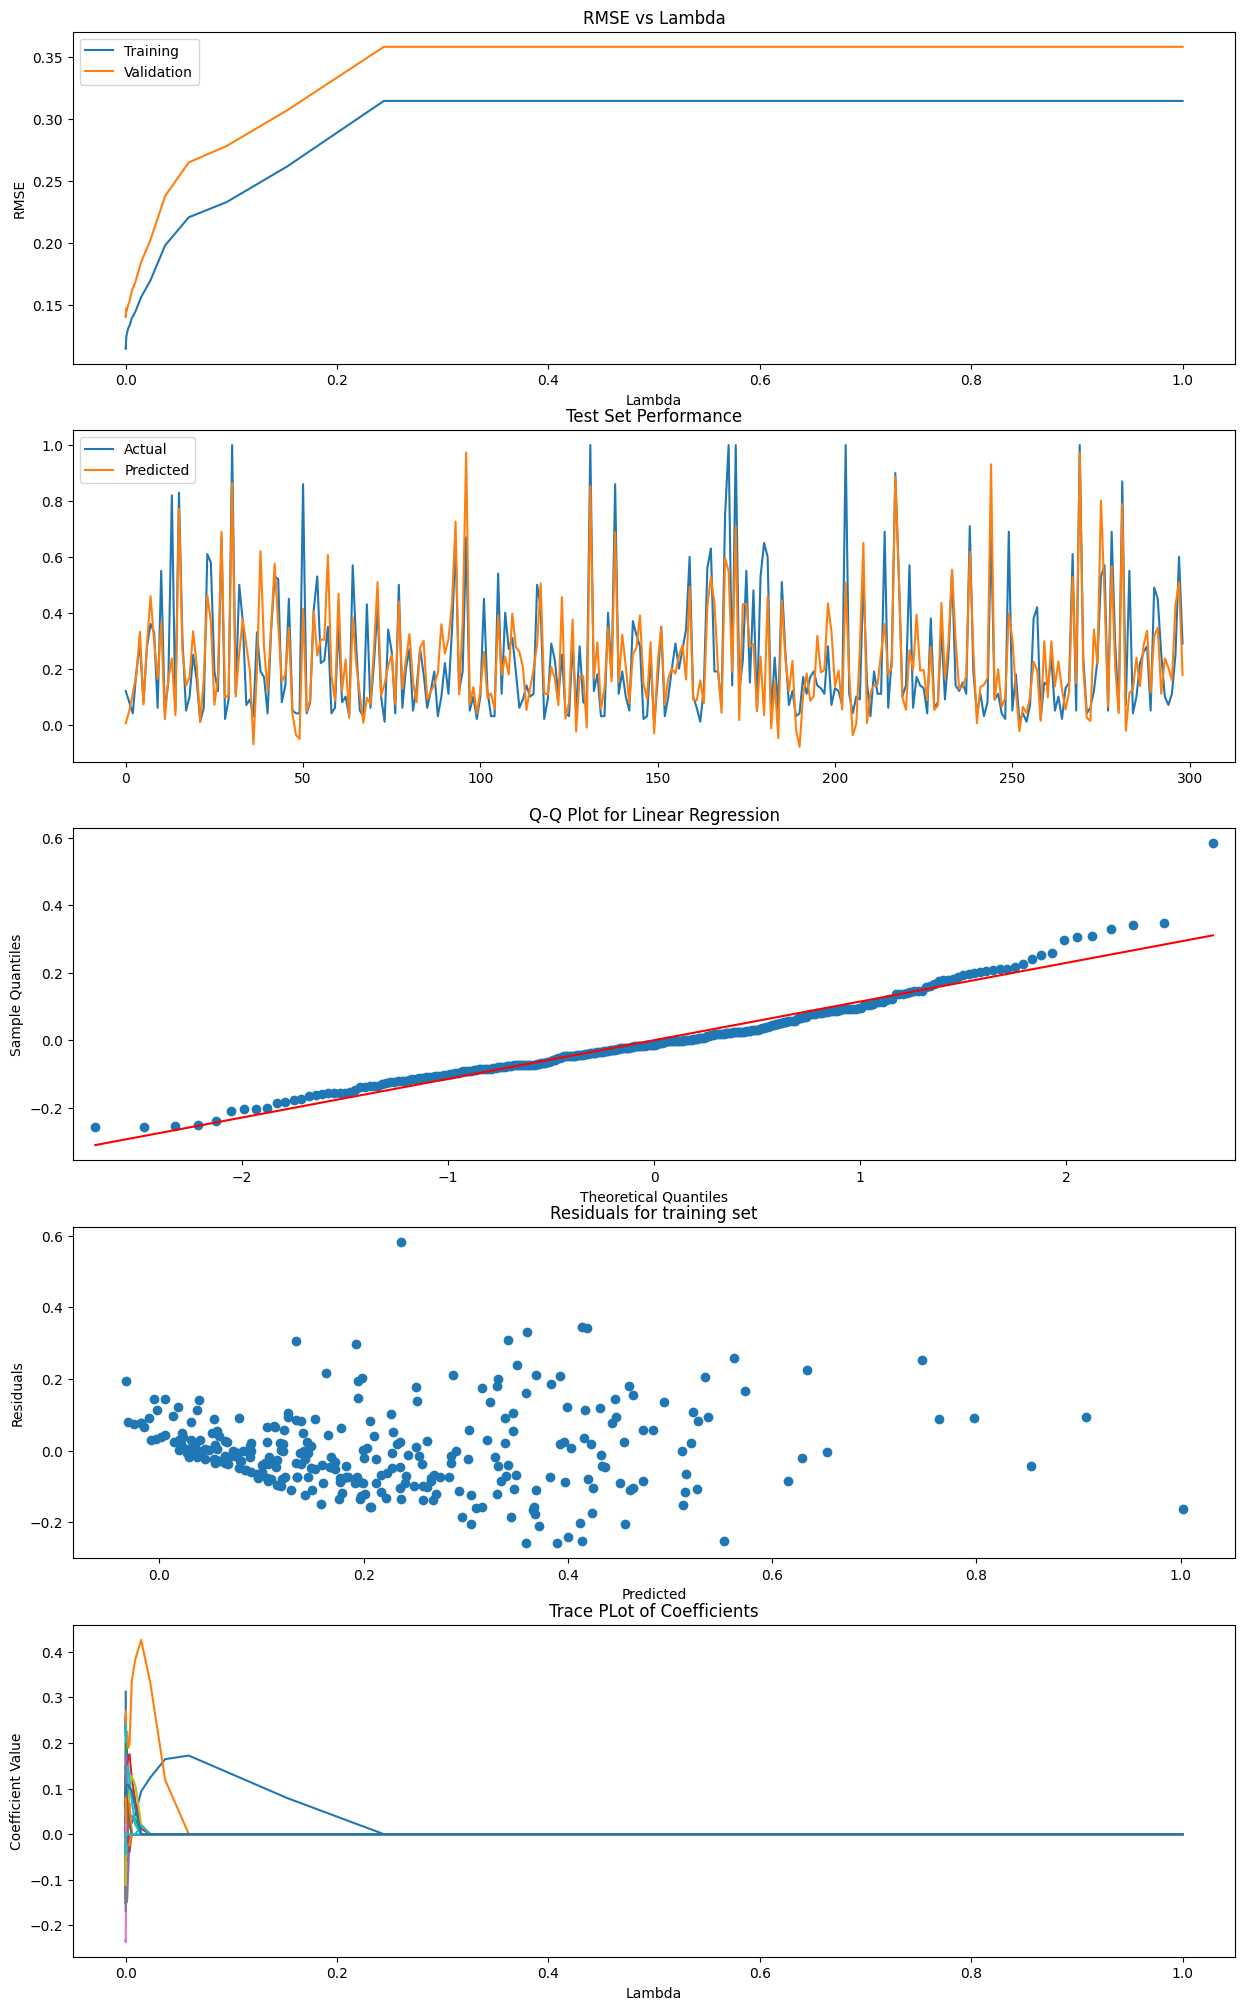

In [5]:
# train your regularised models (ridge and lasso). Here you will use the same data as you used in for the above regression model
#
# One key consideration with your regularised models is the selection of lambda (i.e. the strength of the regularisation). A suggested 
# starting point for finding your value of lambda is suggested below using numpy.logspace (see 
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). The code below will give you 50 values starting at 10-10 and 
# finishing at 1, spread on a log scale. Just note that for plotting things that result from this, you may want to change the scale of 
# your x-axis to a log scale (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html)
#
# Note that the below list of lambda is going to be fairly coarse. For the sake of speed, we suggest that you avoid evaluating a huge
# number of lambdas in one pass, but you can get a more precise estimate by refining your estimate over multiple passes (i.e. if your
# initial estimate if 0.1, you could run the search again now looking over a range of [0.01 .. 1.0] or similar). If you wish to do this,
# we suggest limiting yourself to 2-3 passes at most. You do not need to get the perfect value of lambda.
#
# remember that lambda is a keyword in python, so we're calling the array below alphas. 
#
alphas = np.logspace(-10, 0, 50)

def rmse(actual, pred):
  return np.sqrt(mean_squared_error(actual, pred))

def r_squared(actual, predicted):
  r2 = r2_score(actual, predicted)
  return r2

def adj_r2(actual, predicted, n, p):
  r2 = r2_score(actual, predicted)
  adjr2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
  return adjr2

def evaluate_regularisation(x_train, y_train, x_val, y_val, x_test, y_test, alpha_list, L1_L2):
  # Ridge: L1_L2 = 0
  # Lasso: L1_L2 = 1
  # create the model
  model = sm.OLS(y_train, x_train)
  # initialise the value for best RMSE that is obnoxiously large, as we want this be 
  # overwritten each time RMSE is smaller, since smaller is better and we want to 
  # update our best models each time the RMSE is smaller.
  best_rmse = 10e12
  best_alpha = []
  best_coeffs = []
  
  rmse_val = []
  rmse_train = []
  coeffs = []          # only needed for trace plots

  for alpha in alpha_list:
    model_cross_fit = model.fit_regularized(alpha=alpha, L1_wt=L1_L2)
    train_pred = model_cross_fit.predict(x_train)
    val_pred = model_cross_fit.predict(x_val)
    # want to append the rmse value to a list, as will plot all values later on
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    rmse_val.append(np.sqrt(mean_squared_error(y_val, val_pred)))
    coeffs.append(model_cross_fit.params)
    # if this is the model with the lowest RMSE, lets save it
    # the [-1] index says get the last value from the list (which is the most recent RMSE)
    if rmse_val[-1] < best_rmse:
      best_rmse = rmse_val[-1]
      best_alpha = alpha
      best_coeffs = model_cross_fit.params
      
  print('Best values on Validation Data set')
  # extract the gradient and the bias from the coefficients
  # The reshape will make sure the slope is a column vector
  slope = np.array(best_coeffs[0:]).reshape(-1, 1)
  # the intercept coefficient is the last index variable, which was included with the
  # sm.add_constant() method
  # use the @ operator to perform vector/matrix multiplication
  pred_val_rescaled = (x_val @ slope)
  pred_test_rescaled = (x_test @ slope)
  pred_train_rescaled = (x_train @ slope)

  best_r2 = r_squared(y_train, pred_train_rescaled)
  best_adj_r2 = adj_r2(y_train, pred_train_rescaled,
                           x_train.shape[0], x_train.shape[1]) 
  best_val_rmse = np.sqrt(mean_squared_error(y_val, pred_val_rescaled))
  best_test_rmse = np.sqrt(mean_squared_error(y_test, pred_test_rescaled))
  print('Best R Squared = {}'.format(best_r2))
  print('Best Adjusted = {}'.format(best_adj_r2))
  print('Best RMSE (val) = {}'.format(best_val_rmse))
  print('Best RMSE (test) = {}'.format(best_test_rmse))
  print('Best coefficients on the normalised model')
  print('Best slope = {}'.format(slope))
  
  # now plotting some data
  fig, axs = plt.subplots(5, figsize=(15, 25))
  
  # plot the first values of alpha vs RMSE for train and validation data    
  axs[0].plot(np.array(alpha_list), rmse_train)
  axs[0].plot(np.array(alpha_list), rmse_val)
  axs[0].legend(['Training', 'Validation'])
  axs[0].set_title('RMSE vs Lambda')
  axs[0].set_xlabel('Lambda')
  axs[0].set_ylabel('RMSE')    
  
  # plot prediction and true values for test set
  axs[1].plot((y_test))
  axs[1].plot((x_test @ slope))
  axs[1].legend(['Actual', 'Predicted'])
  axs[1].set_title('Test Set Performance')
  
  # plotting the Q-Q plot
  train_pred = (x_train @ slope).reshape(y_train.shape)
  resid = y_train - train_pred
  sm.qqplot(resid, ax=axs[2], line='s')
  axs[2].set_title('Q-Q Plot for Linear Regression')

  # plot the residuals as well
  axs[3].scatter(train_pred, resid)
  axs[3].set_title('Residuals for training set')
  axs[3].set_xlabel('Predicted')
  axs[3].set_ylabel('Residuals')

  # trace plot of coefficients
  axs[4].plot(np.array(alpha_list), coeffs)
  axs[4].set_title('Trace PLot of Coefficients')
  axs[4].set_xlabel('Lambda')
  axs[4].set_ylabel('Coefficient Value')

# call the function to evaluate the ridge model
evaluate_regularisation(X_train_sm, y_train, X_val_sm, y_val, X_test_sm, y_test, alphas, 0)

# call the function to evaluate the lasso model
evaluate_regularisation(X_train_sm, y_train, X_val_sm, y_val, X_test_sm, y_test, alphas, 1)

In [6]:
# For your write-up, you should include:
# - a discussion of any pre-processing you did and why; or why you left the data as-is
# - a discussion of how you selected the values of lambda used in your regularised models, and what those values are
# - a comparison of three models, considering both the accuracy and validity of the models, as outlined above, this means:
#   > accuracy of the model
#   > measures of fit, such as R^2
#   > testing assumptions about the independence of predictors, and the distribution of the residuals
# - A discussion of the ethical concerns that need to be considered when evaluating the models developed for this problem
# Your write-up should be supported by appropriate figures and tables. Figures and tables should have numbers and meaningful captions. 
# Note that figures and tables are not included in the page limits.
#
# SEE THE ASSIGNMENT BRIEF ON CANVAS FOR MORE DETAILS AND NOTE THAT A NOTEBOOK FILE DOES NOT CONSTITUTE A VALID SUBMISSION. 
# YOU SHOULD WRITE UP YOUR RESPONSE IN A SEPARATE DOCUMENT